## The Central Limit Theorem: Confidence intervals and the T-distribution

### Introduction

Up until now, we've largely spent time on **descriptive statistics**:
quantities that summarize a given dataset and are broken down into measures of central tendency (ie... the mean, median, and mode) and measurements of variability or spread (ie... variance and standard deviation).

Now we are moving into the domain of **inferential statistics** where we will discuss the techniques of describing the *uncertainty* of a given numeric estimate in a formal, rigorous way.

### Uncertainty in reporting numbers


An example: you work for a furniture company that wants to develop a desk chair specifically designed for 12-year-old children. Your boss wants to know how tall the back of the chair should be, to accommodate this customer segment.

Obviously you are not able to get measurements for all 12-year-olds in the current year or over a history of time. Because we cant measure this segment of interest entirely and directly, instead, you'll need to use sampling and statistical knowledge to report a measurement to your boss. This is a form of **inferential statistics**, because you are **drawing conclusions beyond just describing statistics of your sample data**.

Let's say you perform some ergonomics studies on a sample of subjects and conclude that, on average, 15 inches is the best chair back height.

In addition to the measurement itself, you'll want to provide some additional information about uncertainty. Given the information you have collected, how confident are you that 15 inches is the appropriate measurement?

- One way you could hedge and avoid giving the "wrong" answer would be to say that "I am confident that the best chair back height is between 0 and 1 million inches". You would be technically correct, but that is not actually useful to your audience/boss/stakeholder

- On the other hand, if you arbitrarily choose some interval, like "14-16 inches", that might sound more reasonable, but you still wouldn't be able to ground that statement in actual statistical analysis.

Confidence intervals are a tool that allows us to give a more formal answer to this question, and they form the basis for the statistical testing (hypothesis testing) covered in the next

## Outline for today

In order to understand and apply confidence intervals, we will review three concepts:

- The Central Limit Theorem
- Confidence intervals
- The T-distribution

## The Central Limit Theorem and Bootstrapping

![](../images/clt_programbuzzdotcom.png)

**Helping us accurately estimate the parameters of a population**

### The Big Picture
1. If you draw large(minimum of 30), random samples from any population(regardless of it's distribution), the means of those samples will be distributed normally around the population mean(which is likely unknown).

2. Most sample means will lie reasonably close to the population mean; the standard error defines reasonably close.

3. It is relatively unlikely that a sample mean will lie more than 2 standard errors from the population mean and extremely unlikely that it will lie 3 or more SE from the population mean.

#### Let's think through an example
Suppose we want to know the average income of all people at a company but our sample of the entire population consists of 39 people from across the company at a meeting. According to the CLT we could take repeated samples (with replacement) of the persons in the meeting and get those sample means; plot them and then take the mean of those sample means. That sample means mean should be very close to the actual population mean. Some means will be higher and lower due to chance.

#### Revisiting Standard Error

SE = $\frac{\sigma}{\sqrt{n}}$ <br/>
$\sigma$ = sample standard deviation <br/>
n = number of samples 

- SE measures the dispersion (or spread) of the sample means. SD measures the dispersion in the underlying population. 
- A large SE means that the _sample means_ are spread out widely around the population mean - you can try to solve this problem by getting larger sample sizes. However, if you still have a high SE after getting larger sample sizes you must conclude that the SD of the underlying population must also be large. 

#### Bootstrapping

One method of getting the confidence interval is to use bootstrap sampling. The idea is that we sample our sample to get an idea of what extreme values we could have got when sampling the population. With this, we can construct a confidence interval for our sample of the population

The important thing to realize is we only use our sample to determine the confidence interval.

![](https://miro.medium.com/max/700/1*iH5w0MBdiOlxDOCX6nmqqw.png)

##### Lets go through this with an example using the titanic dataset

In [5]:
import numpy as np
import pandas as pd
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
# External file
titanic_file = 'https://github.com/MrGeislinger/flatiron-school-data-science-curriculum-resources/raw/main/ProbabilityAndStats/StatisticalDistributions/data/titanic.csv'
df_titanic = pd.read_csv(titanic_file)
ages = df_titanic.Age.dropna()

0.42

80.0

14.516321150817317

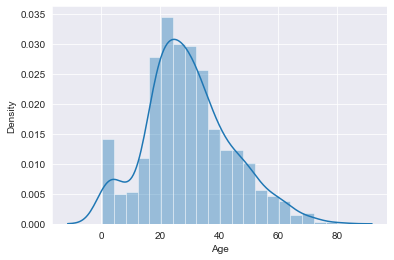

In [7]:
sns.distplot(ages)
display(np.min(ages), np.max(ages), np.std(ages))

In [13]:
# Get one sample of our ages data.
sample = ages.sample(10, replace=True, random_state=1)
print(sample.mean())
display(sample)

25.7


51     21.0
291    19.0
93     26.0
808    39.0
179    36.0
161    40.0
733    23.0
642     2.0
489     9.0
349    42.0
Name: Age, dtype: float64

In [26]:

def get_all_sample_means(data, n=10, n_samples=100):
    '''
    This functions gets 100 10-record samples from given data
    
    Arguments: 
    
    data      - The data set to draw our samples from
    n         - the sample size (# of rows or records in our sample)
    n_samples - the number of samples to draw
    
    Returns:
    
    means     - an array containing the arithmetic mean of each sample taken.
    '''
    samples = np.random.choice(data,size=(n_samples,n))
    means = np.mean(samples, axis=1)
    
    return means

In [27]:
# Get many samples and their respective means
samples_means = get_all_sample_means(ages,n=10, n_samples=30)
samples_means

array([28.3  , 30.217, 33.9  , 37.15 , 28.7  , 23.5  , 30.1  , 30.6  ,
       22.783, 25.9  , 29.4  , 31.5  , 27.9  , 33.9  , 25.1  , 21.9  ,
       25.675, 24.45 , 24.2  , 29.1  , 27.7  , 32.4  , 32.75 , 23.7  ,
       25.8  , 30.2  , 35.75 , 31.05 , 31.35 , 23.675])

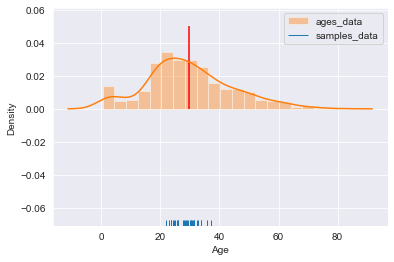

In [29]:
# See the sample and the full data compared

sns.distplot(
    samples_means,    # Shows sample means
    kde=False, 
    hist=False, 
    # allows us to look at the distribution of points of an axis of data as a 
    # layer of data points under our original plot
    rug=True,
    label='samples_data'
)

ax = sns.distplot(ages,label='ages_data')
ax.vlines(ages.mean(), color='red',ymin=0,ymax=0.05);
ax.legend()

In [21]:
def bootstrap_sample(sample, n_samples=10**4):
    
    bs_sample_means = get_all_sample_means(
        sample, 
        n=len(sample),
        n_samples=n_samples
    )
    
    return bs_sample_means

In [30]:
b_sample_means = bootstrap_sample(sample)
display(np.mean(sample))
display(b_sample_means)

25.7

array([24.1, 22.6, 22.1, ..., 27.5, 25.3, 21.2])

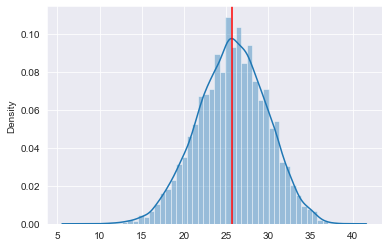

In [31]:
sns.distplot(b_sample_means)
plt.axvline(b_sample_means.mean(), color='red')

In [32]:
np.mean(b_sample_means)

25.713420000000003

In [33]:
ages.mean()

29.69911764705882

# Confidence Intervals

In [2]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from math import gamma
%matplotlib inline

# Motivation & Intuition

Ever have an appointment with the cable company to setup your cable and/or internet?

What did they tell you when they scheduled that appointment? 

Something like
> We'll be at your home between 7am to 8pm 

And they're usually right. This is close to how we use **confidence intervals**

## Balancing Precision and Uncertainty

When we sample a population, we'd like to use the sample to tell us something about the population. But we're never 100% sure that the sample statistic (like the mean) is reflective of the population's true value. Maybe we sampled a bunch of weird data points.

There is a **trade-off** here between precision and certainty: The more precise we are in our estimate of a population parameter, the less certain we can be in our estimate, and vice versa.

Sometimes it's important to be certain, and so we'll make our estimates relatively imprecise (like a window for an appointment to hook up cable). Other times it's important to be precise, and so we'll sacrifice a level of certainty for that precision.

### 🧠 Knowledge Check

> Say we get a sample from our population and measure the mean. What factors would make us more or less confident in drawing conclusions about the population?

### Using Confidence Intervals to Drive that Balance

> Because sample statistics are imperfect representations of the true population values, it is often appropriate to state these estimates with **confidence intervals**.

### Scenario: I Have a Sweet Tooth 🦷

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e4/JellyBellyPile.JPG" width=50%/>

> * Big bag of jelly beans (Population): $10,000$ jelly beans
> * Weigh a sample of $50$ jelly beans
>     - Average weight is $1.25$ grams

Can I take this data as a **good estimate** of the average weight over the whole *population* of jelly beans?

In a word, yes. (What else do I have to go on!?) 

But how do I express how close this estimate is to the population?

#### Solution

Natural idea: I'll say I'm _confident_ that the real population value lies in some neighborhood or **interval** around the value I measured from my sample.

![](../images/heres_your_estimate.gif)

Notice:

- Larger samples → more confident estimate represents population
- Larger intervals →  more confident true population value falling within interval

## Key Points

- **Sample statistics** are _supplemented_ with **confidence intervals** to approximate the population
- Generally believe **sample statistic** is in the _neighborhood_ of true population's statistic
- The larger the sample, the less likely we got all the "weirdo" data points from the population
- We **trade certainty with precision** by expanding our interval
- Taking multiple samples (experiments) gives us a better idea of where the true population parameter value lies

# Constructing Confidence Intervals

> **Confidence interval** will depend on the statistics of our sample: 
> * Our measured/observed **sample mean**
> * Our **sample size**
> * Also depends on the underlying distribution of our data 
>     - _Is it a normal distribution?_

There are a few methods in constructing a confidence interval. We'll go over two common methods, involving the normal curve (Gaussian method) and a method involving a new distribution called the _$t$-distribution_.

## Gaussian Method: Compare Sample with the Normal Curve 

> If our data are **normally** distributed, then we can use the shape of the normal curve to help us

![Gaussian distribution with percent](https://upload.wikimedia.org/wikipedia/commons/8/8c/Standard_deviation_diagram.svg)

* Assume confidence interval will be **centered on our sample mean**
* Endpoints are based on number of $z$-scores left & right of mean given by the **standard error**

> **Standard Error** ($s_\bar{x}$ or $\hat{\sigma_\bar{x}}$): The estimate of the population variance is a function of the overall variance of the sample and the size of the sample
>
> $$
\large \sigma \approx \hat{\sigma_\bar{x}} = \frac{\sigma_x}{\sqrt{n}} \\
\text{or} \\
 \large \sigma  \approx  s_\bar{x} = \frac{s_x}{\sqrt{n}}
$$
>
> Note that the $x$ subscript reminds us this is derived from the sample

The number of steps we take from the mean is determined by which **level of confidence** we want attached to our interval. In particular, we take $z$-many steps, where $z$ is the (two-tailed) $z$-score that corresponds to our chosen level of confidence.

If our data are **not** normally distributed, then there are several strategies we might try, some of which ultimately depend on some connection to the normal distribution, like a strategy that appeals to the Central Limit Theorem.

### Confidence Intervals for Normally Distributed Data

Let's look at an example with data we assume to be normally distributed:

In [41]:
# A normally distributed variable with a population size of 1000

population = list(stats.norm.rvs(size=1000,
                          random_state=42))

In [42]:
# Let's calculate the population mean.

pop_mean = np.mean(population)
pop_mean

0.01933205582232549

In [43]:
# And the population standard deviation.

pop_std = np.std(population)
pop_std

0.9787262077473543

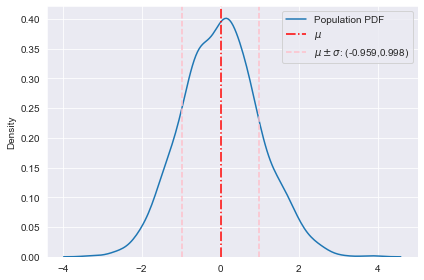

In [44]:
# Visualizing population (approximately normal)
f, ax = plt.subplots()
ax = sns.kdeplot(population, ax=ax, label='Population PDF')
plt.axvline(pop_mean, ls='-.', c='r', label='$\mu$')

std_label = f'$\mu \pm\sigma$: ({pop_mean-pop_std:.3f},{pop_mean+pop_std:.3f})'
plt.axvline(pop_mean-pop_std, ls='--', c='pink')
plt.axvline(pop_mean+pop_std, ls='--', c='pink', label=std_label)
ax.legend()
plt.tight_layout()

Let's say we take a sample of 50 from our population and that we want a 90%-confidence interval for our estimate of the population mean. 

In [56]:
# Take a sample from the population
np.random.seed(42)
sample = np.random.choice(a=population, size=50)

# Find the sample mean
sample_mean = np.mean(sample)
sample_mean

0.17715311316172172

In [57]:
# Find the standard deviation of the sample
sample_std = np.std(sample)
sample_std

1.0178600326618807

The $z$-score that corresponds to a 90%-confidence interval can be calculated.
In this case, we want 5% on the left, 5% on the right 

![](https://upload.wikimedia.org/wikipedia/commons/7/7f/Confidence_Interval_90P.png)

#### Remember the empirical rule aka the 68,95,99.7 rule of normal distributions!!!

> Rule states that $68\%$ of the values of a normal distribution of data lie within 1 standard deviation ($\sigma$) of the mean, $95\%$ within $2\sigma$, and $99.7\%$ within $3\sigma$.  

<img src='https://github.com/learn-co-students/dsc-0-09-12-gaussian-distributions-online-ds-ft-031119/blob/master/normalsd.jpg?raw=true' width=700/>

##### Note that using the ppf function for getting % confidence, one must ad 5% to the number 

<img src="https://cdn-images-1.medium.com/max/800/0*i0yTYIZw0pgaZAsh.png">

In [58]:
# This gives the z-score for the 95th-percentile
z = stats.norm.ppf(0.95)
z

1.6448536269514722

In [59]:
# Finding standard error
standard_error = sample_std / np.sqrt(50)
standard_error

0.14394714627879532

Once we have the mean, z, and standard error, we can calculate the CI:

left endpt.: $\bar{x} - z\times\frac{\sigma}{\sqrt{n}}$ <br/>
right endpt.: $\bar{x} + z\times\frac{\sigma}{\sqrt{n}}$

In [11]:
z * standard_error

0.23677198564599058

In [60]:
# Finding confidence interval
(sample_mean - z * standard_error, sample_mean + z * standard_error)

(-0.059618872484268864, 0.41392509880771233)

Thus we'd report our estimate of the population mean as $0.177 \pm 0.237$, or, equivalently, as $(-0.060, 0.414)$. Note that the true population mean of $0.0193$ is in fact in this range.

#### 🧠 Knowledge Check

> What if I wanted an 80%-confidence interval?

## $t$-Distribution Method: When Sample isn't Normal

Formally called the "Student's $t$-distribution" by William Gosset in 1908

![imgguiness](../images/guiness.png)

Similar to normal curve, but drops off less quickly at the tails (less certain that the mean is the "actual" mean)

More **degrees of freedom** (essentially more data; more independent ways to vary) --> closer to a normal curve

PDF of $t$-distribution: ${\frac {\Gamma \left({\frac {\nu +1}{2}}\right)}{{\sqrt {\nu \pi }}\,\Gamma \left({\frac {\nu }{2}}\right)}}\left(1+{\frac {x^{2}}{\nu }}\right)^{-{\frac {\nu +1}{2}}}\!$, where $\Gamma$ denotes the [Gamma Function](https://en.wikipedia.org/wiki/Gamma_function).

parameter: $\nu > 0$ where $\nu$ is degrees of freedom (n-1)

**$t$ distribution becomes closer to the normal distribution ($z$ distribution) as n increases**
![zvt](../images/z_vs_t.png)

We can use the normal distribution when:
* the population standard deviation is known; and
* the sample size is greater than 30.

If **either** of these fails, we need to use the **$t$-distribution**. The $t$-distribution is wider and has different critical values for different sample sizes.

In [ ]:
fig, ax = plt.subplots(7, figsize=(10, 20))

X = np.linspace(-10, 10, 201)
nus = np.arange(2, 9)
y_norm = 1 / np.sqrt(2*np.pi) * np.exp(-0.5 * X**2)

for j in range(7):
    y = gamma((nus[j]+1) / 2) / (np.sqrt(np.pi*nus[j]) * gamma(nus[j] / 2)) *\
(1 + X**2/nus[j])**((-nus[j]+1) / 2)
    ax[j].plot(X, y, label=fr't-Distribution, $\nu$ = {nus[j]}')
    ax[j].plot(X, y_norm, label='Normal Distribution')
    ax[j].legend();

### Confidence Intervals for $t$-Distribution

The construction of confidence intervals for the $t$-distribution is similar to how they are made for the normal distribution. But instead of $z$-scores, we'll have $t$-scores. And if we don't have access to the population standard deviation, we'll make use of the sample standard deviation instead.

left endpt.: $\bar{x} - t\times\frac{s}{\sqrt{n}}$ <br/>
right endpt.: $\bar{x} + t\times\frac{s}{\sqrt{n}}$

Let's use the same example from above, this time creating a 90% CI using the t-distribution.

In [53]:
# Find the t-score, specifying degrees of freedom
t = stats.t.ppf(0.95, df=50-1)
t

1.6765508919142629

In [54]:
# Calculate the confidence interval
(sample_mean - t * standard_error, sample_mean + t * standard_error)

NameError: name 'sample_mean' is not defined

Note that because we have 50 items in our sample, this answer is not very different using the t-distribution compared to the normal distribution.

#### `stats.t.interval` Interface

There is also an alternative interface for calculating the confidence interval if we don't need to access the t-statistic directly.

In [50]:
stats.t.interval(
    alpha=0.9,           # Confidence level
    df=50-1,             # Degrees of freedom
    loc=sample_mean,     # Sample mean
    scale=standard_error # Unit scale for t-distribution
)

NameError: name 'sample_mean' is not defined

### $t$-Distribution Examples

#### Generated Normal Samples

Let's play around with making different confidence intervals for different sample sizes

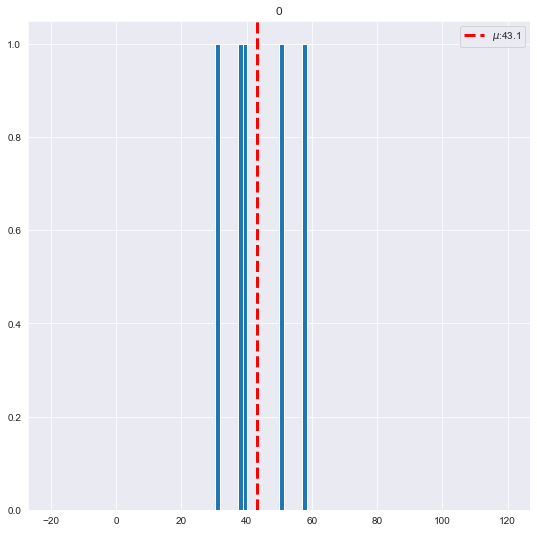

,0
count,5.000000
mean,43.127396
std,10.531263
min,30.667344
25%,37.513701
50%,40.062196
75%,50.229846
max,57.163893


In [49]:
# samples = np.random.normal(54, 17, size=100000)
# samples = np.random.normal(54, 17, size=500)
samples = np.random.normal(54, 17, size=5)
mean = samples.mean()

pop_ages = pd.DataFrame(samples)
pop_ages.hist(bins=100,range=(-20,120),figsize=(9,9))
plt.axvline(mean, linewidth=3, ls='--', c='r', label=f'$\mu$:{mean:.1f}')
plt.legend()
plt.show()

pop_ages.describe()

In [ ]:
# Min and Max of Confidence Interval
stats.t.interval(alpha=0.95,          
                 df=len(samples)-1,    
                 loc=samples.mean(),
                 scale=stats.sem(samples))    

#### Scenario

You are inspecting a hardware factory and want to construct a 90% confidence interval of acceptable screw lengths. You draw a sample of 30 screws and calculate their mean length as 4.8 centimeters and the standard deviation as 0.4 centimeters. What are the bounds of your confidence interval?

In [ ]:
n = 30
mean = 4.8
sd = 0.4
t_value = stats.t.ppf(0.95, n-1)
margin_error = t_value * sd/(n**0.5)
confidence_interval = (mean - margin_error, mean + margin_error)

confidence_interval

In [ ]:
stats.t(loc=4.8, scale=0.4/(30**0.5), df=n-1).interval(alpha=0.9)

# Interpreting Confidence Intervals

Wrong:
> There is a 95% probability that the mean age is between 26.3 and 28.3

Correct:
> If we find 100 (random) samples and create confidence intervals, we expect 95 intervals would contain the true mean of population age.

> We are confident in this interval because we expect that a true population mean outside of this interval would produce these results 5% or less of the time. In other words, only an unlikely (but not impossible) sampling event could have caused us to calculate this interval, if the true mean is outside of this interval.


**The true population mean is a specific value and we do not know what it is.** The confidence level you choose is a question of how often you are willing to find an interval that does not include the true population mean, but it doesn't tell you whether this particular sample + interval calculation gave you the "right" answer.

## Note on Notation:

"we found our 95% confidence interval for ages to be from 26.3 and 28.3"

OR 

"we are 95% confident that the average age falls between 26.3 and 28.3"

## A Visual Interpretation of CIs

In [ ]:
# This function displays num_samples-many confidence
# intervals for an input population, sample_size, and
# confidence_level.

def ci_plotter(population, sample_size=20, num_samples=20, confidence_level=0.95):
    from scipy import stats
    intervals = []
    for _ in range(num_samples): # number of intervals
        sample = np.random.choice(population, sample_size)
        step = np.std(population) / np.sqrt(sample_size) # standard error
        semi_int_size = step * stats.norm.ppf(1 - (1-confidence_level)/2)
        
        x_min = np.mean(sample) - semi_int_size # left endpt. of interval
        x_max = np.mean(sample) + semi_int_size # right endpt. of interval
        intervals.append(np.linspace(x_min, x_max, 30)) # add interval
                                                        # to intervals
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot(intervals, range(1, num_samples+1), '.') # plot intervals evenly and
                                                        # vertically
    ax.vlines(np.mean(population), 0, num_samples+1, lw=3);

In [ ]:
ci_plotter(population=population)

# Exercise Time 💪🏼

In [ ]:
# Your turn!

# You're weighing walruses in the Arctic in the attempt to estimate
# the mean weight of the Canadian walrus population. You have a sample
# of 30 walrus weights. The mean of the sample is 2000 lbs. and the
# standard deviation is 200 lbs. Calculate the 80%-confidence interval.
# Calculate the 70%-confidence interval. How do they compare to the
# normal-distribution CIs? (To calculate the latter, just use the 
# sample standard deviation.)






<details>
    <summary>Answer</summary>
<code># statistics
n = 30
x_bar = 2000
s = 200
# calculate t-values
t_value80 = stats.t.ppf(0.9, n-1)
t_value70 = stats.t.ppf(0.85, n-1)
# calculate t-margins of error
margin_error80 = t_value80 * 200/(n**0.5)
margin_error70 = t_value70 * 200/(n**0.5)
# calculate 70%- and 80%-intervals
conf_int80 = (x_bar - margin_error80, x_bar + margin_error80)
conf_int70 = (x_bar - margin_error70, x_bar + margin_error70)
# calculate z-values
z_score80 = stats.norm.ppf(0.9)
z_score70 = stats.norm.ppf(0.85)
# calculate z-margins of error
error_norm80 = z_score80 * 200/(n**0.5)
error_norm70 = z_score70 * 200/(n**0.5)
# calculate 70%- and 80%-intervals
conf_norm80 = (x_bar - error_norm80, x_bar + error_norm80)
conf_norm70 = (x_bar - error_norm70, x_bar + error_norm70)
# print out results
print(conf_int80)
print(conf_int70)
print(conf_norm80)
print(conf_norm70)</code>

# Level Up: Confidence Intervals for Non-Normally Distributed Data

One of the most commonly used strategies for dealing with non-normally distributed data is to find a way to reduce the problem to one that involves normally distributed data!

[Here](https://file.scirp.org/Html/3-1240887_76758.htm) is a review article that compares several different strategies. (Note that it ultimately recommends a sort of Bayesian method. We'll get to Bayesian reasoning in a later lesson.)

# Level Up: Bootstrap

One method of getting the confidence interval is to use **bootstrap** sampling. The idea is that we sample our sample to get an idea of what extreme values we could have got when sampling the population. With this, we can construct a confidence interval for our sample of the population 

The important to realize is we _only use our sample_ to determine the confidence interval.

![Sampling from population](https://github.com/flatiron-school/ds-central_limit_theorem/raw/008cecd491af6cf1df358903b6df622aac54c999/img/sample_pop.png)

Below is an example of how this can be done.

## Example

In [ ]:
# External file
titanic_file = 'https://github.com/MrGeislinger/flatiron-school-data-science-curriculum-resources/raw/main/ProbabilityAndStats/StatisticalDistributions/data/titanic.csv'
df_titanic = pd.read_csv(titanic_file)
ages = df_titanic.Age.dropna()

In [ ]:
sns.distplot(ages)
display(np.min(ages), np.max(ages), np.std(ages))

In [ ]:
# Get an example sample
sample = ages.sample(10, replace=True)
print(sample.mean())
display(sample)


In [ ]:
def get_all_sample_means(data, n=10, n_samples=100):
    '''
    '''
    #
    samples = np.random.choice(data, size=(n_samples, n))
    means = np.mean(samples, axis=1)
    #
    return means

In [ ]:
# Get many samples and their respective means
samples = get_all_sample_means(ages, n=10, n_samples=30)
samples

In [ ]:
# See the sample and the full data compared
sns.distplot(
    samples,    # Shows sample means
    kde=False, 
    hist=False, 
    rug=True
)
ax = sns.distplot(ages)
ax.vlines(ages.mean(), color='red',ymin=0,ymax=0.05)

### Finding the Confidence Interval

In [ ]:
def bootstrap_sample(sample, n_samples=10**4):
    '''
    '''
    #
    bs_sample_means = get_all_sample_means(
        sample, 
        n=len(sample),
        n_samples=n_samples
    )
    
    return bs_sample_means

In [ ]:
b_sample_means = bootstrap_sample(sample)
display(np.mean(sample))
display(b_sample_means)

In [ ]:
sns.distplot(b_sample_means)
plt.axvline(b_sample_means.mean(), color='red')

In [ ]:
np.mean(b_sample_means)

In [ ]:
two_std = np.std(b_sample_means)*2
(np.mean(sample)-two_std, np.mean(sample)+two_std)